**This jupyter notebook makes it possible to apply a simple low pass filter to sine wave with a superimposed high frequency noise. It is possible to study the effectiveness of the filter by varying the cut-off frequency**


**Author**: Luca Giaccone (luca.giaccone@polito.it)<br>
**Date**: 7/11/2021<br>
**GitHub link**: [https://github.com/giaccone/pytool4teaching](https://github.com/giaccone/pytool4teaching)

In [1]:
# standard module import
from matplotlib import rc
rc('font',**{'family':'serif'})
rc('text', usetex=True)
import numpy as np
import matplotlib.pyplot as plt
plt.ion()
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider, Layout
import ipywidgets as widgets
begin_bold = '\033[1m'
end_bold = '\033[0m'

# constant definition
SQ2 = np.sqrt(2)
PI = np.pi

In [2]:
# Main voltage
V1 = 220    # V
f1 = 50     # Hz
T = 1/f1
t = np.linspace(0, T, 10000)
v1 = SQ2 * V1 * np.sin(2 * PI * f1 * t)

In [3]:
# noise
V2 = 30       # V
f2 = 5000     # Hz
v2 = np.zeros_like(v1)
Np = 20
T1 = T/4
v2[(t > T1) & (t < T1 + Np/f2)] = SQ2 * V2 * np.sin(2 * PI * f2 * t[(t > T1) & (t < T1 + Np/f2)])

In [4]:
# superposition
vt = v1 + v2

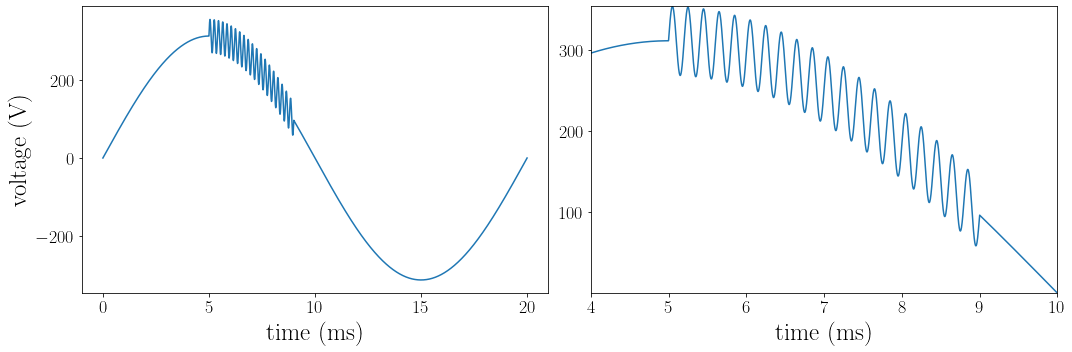

In [5]:
# plots the two waveform (left) and the zoom (right)
hf1 = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)
ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax1.plot(t*1e3,vt)
ax1.set_xlabel('time (ms)', fontsize=25)
ax1.set_ylabel('voltage (V)', fontsize=25)
plt.tight_layout()
ax2.plot(t*1e3,vt)
ax2.set_xlim((T1- 5/f2)*1e3,(T1 + Np/f2 + 5/f2)*1e3)
lmt = vt[(t > T1- 5/f2) & (t < T1 + Np/f2 + 5/f2)]
ax2.set_ylim(lmt.min(), lmt.max())
ax2.set_xlabel('time (ms)', fontsize=25)
plt.tight_layout()

In [6]:
# function of a low pass filter dependent on R, C and f
def flt(R, C, f):
    H = 1 / (1 + 2j * PI * f * R * C)
    return H

In [7]:
# define R and C so that ft is 500 Hz
R = 1e3
C = 1/PI * 1e-6
ft = 1 / (2 * PI * R * C)
print(begin_bold + 'ft = {:.2f} Hz'.format(ft) + end_bold)

ft = 500.00 Hz


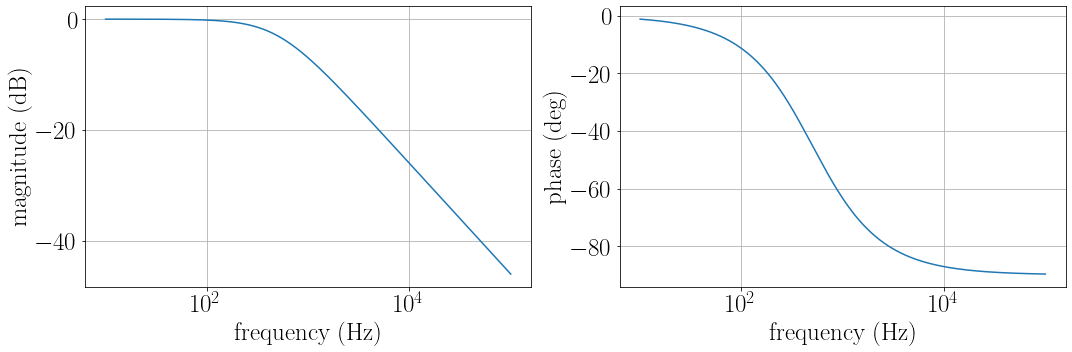

In [8]:
# plot Bode diagram for the above defined filter
f = np.logspace(1,5,1000)
H = flt(R, C, f)

hf1 = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)
ax1.tick_params(labelsize=25)
ax2.tick_params(labelsize=25)
ax1.semilogx(f, 20 * np.log10(np.abs(H)))
ax1.set_xlabel('frequency (Hz)',fontsize=25)
ax1.set_ylabel('magnitude (dB)',fontsize=25)
ax1.grid()
plt.tight_layout()
ax2.semilogx(f, np.angle(H) * 180/PI)
ax2.set_xlabel('frequency (Hz)',fontsize=25)
ax2.set_ylabel('phase (deg)',fontsize=25)
ax2.grid()
plt.tight_layout()

In [9]:
# analyze the filter behaviour at varing frequency
def filter_tuning(ft):

#    ft = 500 #Hz

    # Filtering
    R = 1e3

    # get C as a function of ft
    C = 1 / (2 * PI * R * ft)

    H1 = flt(R, C, f1)
    H2 = flt(R, C, f2)

    Vf1 = H1 * V1
    Vf2 = H2 * V2

    # back to time
    vf1 = SQ2 * np.abs(Vf1) * np.sin(2 * PI * f1 * t + np.angle(Vf1))
    vf2 = np.zeros_like(vf1)
    vf2[(t > T1) & (t < T1 + Np/f2)] = SQ2 * np.abs(Vf2) * np.sin(2 * PI * f2 * t[(t > T1) & (t < T1 + Np/f2)] + np.angle(Vf2))

    # superposition
    vft = vf1 + vf2

    # plots
    hf1 = plt.figure(figsize=(15,5))
    ax1 = plt.subplot2grid((1,2),(0,0),rowspan=1,colspan=1)
    ax2 = plt.subplot2grid((1,2),(0,1),rowspan=1,colspan=1)
    ax1.tick_params(labelsize=25)
    ax2.tick_params(labelsize=25)
    ax1.plot(t*1e3,vt,'C0--')
    ax1.plot(t*1e3,vft,'k')
    ax1.set_xlabel('time (ms)', fontsize=25)
    ax1.set_ylabel('voltage (V)', fontsize=25)
    ax1.text(10,200,'low cut frequency\n{:.0f} Hz'.format(ft),fontsize=25,bbox=dict(facecolor='none', edgecolor='k'))
    plt.tight_layout()
    ax2.plot(t*1e3,vt,'C0--')
    ax2.plot(t*1e3,vft,'k')
    ax2.set_xlim((T1- 5/f2)*1e3,(T1 + Np/f2 + 5/f2)*1e3)
    lmt = vt[(t > T1- 5/f2) & (t < T1 + Np/f2 + 5/f2)]
    ax2.set_ylim(lmt.min(), lmt.max())
    ax2.set_xlabel('time (ms)', fontsize=25)
    plt.tight_layout()

In [10]:
f_start = 500
f_end = 10000
delta_f = 200


style = {'description_width': 'initial'}
interact(filter_tuning, ft=FloatSlider(min=f_start, max=f_end, step=delta_f, continuous_update=False, description='low cut frequency',style=style));

interactive(children=(FloatSlider(value=500.0, continuous_update=False, description='low cut frequency', max=1…